This data is now based on smokers only
The minimum Body Mass Index is 10.19
The maximum Body Mass Index is 75.78
The number of people who can probably be diabetic is 14,762
gender
Female    46.402714
Male      48.492564
Other     32.600000
Name: age, dtype: float64
<class 'list'>


/tmp/ipykernel_1204/1982146781.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=sorted_age['diabetes'], palette="coolwarm")


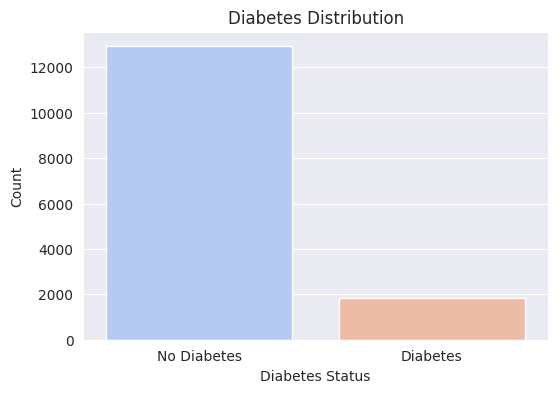

/tmp/ipykernel_1204/1982146781.py:52: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(sorted_age[sorted_age['diabetes'] == 0]['blood_glucose_level'], label="Non-Diabetic", shade=True, color="blue")
/tmp/ipykernel_1204/1982146781.py:53: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(sorted_age[sorted_age['diabetes'] == 1]['blood_glucose_level'], label="Diabetic", shade=True, color="red")


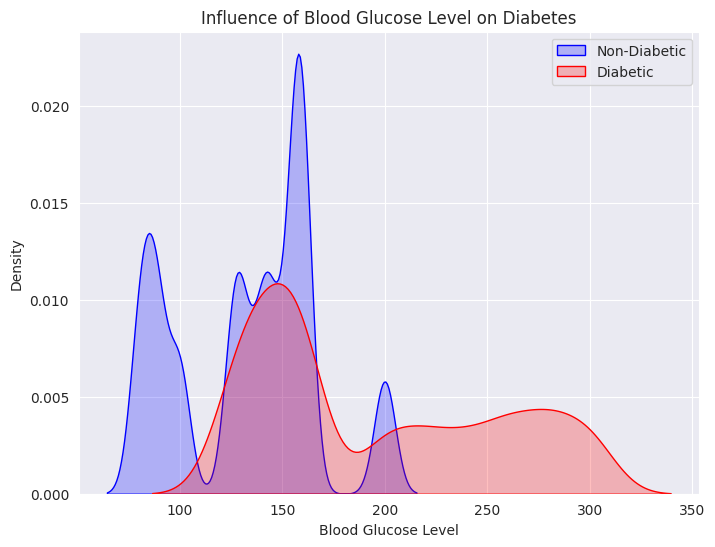

/tmp/ipykernel_1204/1982146781.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=sorted_age['diabetes'], y=sorted_age['HbA1c_level'], palette="coolwarm")


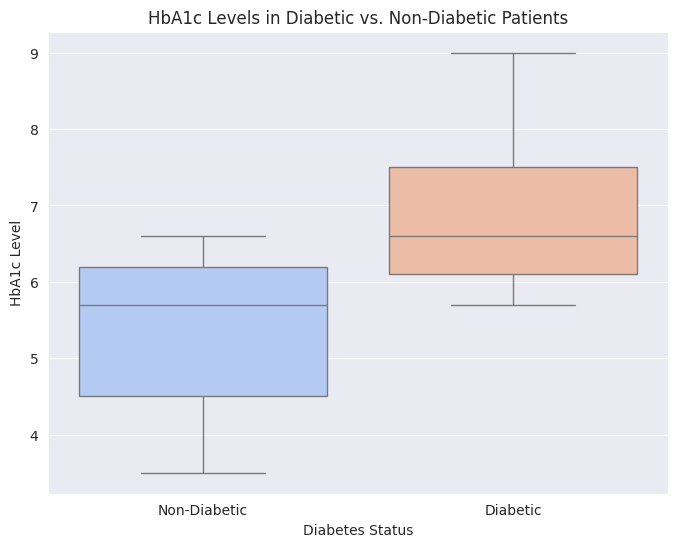

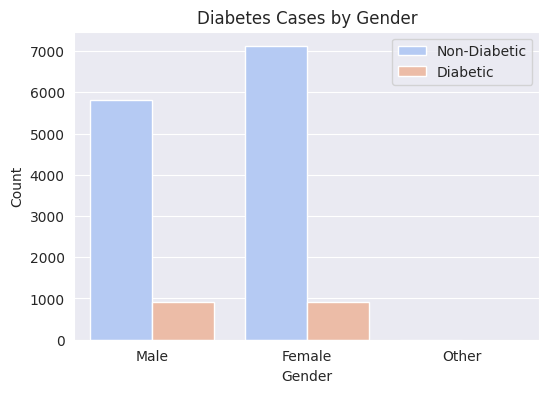

In [10]:
# Importing libraries
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

tips_data = pd.read_csv('diabetes_prediction_dataset.csv')
tips_data.head()

# Data Cleaning
## Handling missing values
tips_data["age"] = tips_data["age"].fillna(0).astype(int)
tips_data = tips_data[tips_data['age']>=1]
tips_data = tips_data.rename(columns={'bmi':'BMI'})

# Filtering rows based on smokers using the isin operators
smokers = ['ever', 'not current', 'current',]
smokers_data = tips_data[tips_data['smoking_history'].isin(smokers)]
print("This data is now based on smokers only")

# Filtering rows based on smokers 
# Being overweight (BMI of 25-29.9) or Obesity(30-39.9) or morbid obesity(40 or greater)
min_val = smokers_data['BMI'].min()
print(f"The minimum Body Mass Index is {min_val}")
max_val = smokers_data['BMI'].max()
print(f"The maximum Body Mass Index is {max_val}")

# Filtering out people with less chance of having diabetes
less_dia = smokers_data[(smokers_data['BMI'] >=25.00) & (smokers_data['BMI']<=75.78)]
less_dia.shape
print("The number of people who can probably be diabetic is 14,762")

# Sorting the dataset based on age
sorted_age = less_dia.sort_values(by=['age'])
sorted_age.shape

## Plotting Graphs
sns.set_style('darkgrid')
sex_mean = sorted_age.groupby("gender")["age"].mean()
print(sex_mean)
print(type(sex_mean.tolist()))

# Probability of a person getting diabetes
plt.figure(figsize=(6, 4))
sns.countplot(x=sorted_age['diabetes'], palette="coolwarm")
plt.xticks(ticks=[0, 1], labels=['No Diabetes', 'Diabetes'])
plt.title("Diabetes Distribution")
plt.xlabel("Diabetes Status")
plt.ylabel("Count")
plt.show()

# How Blood Glucose Level influences Diabetes
plt.figure(figsize=(8, 6))
sns.kdeplot(sorted_age[sorted_age['diabetes'] == 0]['blood_glucose_level'], label="Non-Diabetic", shade=True, color="blue")
sns.kdeplot(sorted_age[sorted_age['diabetes'] == 1]['blood_glucose_level'], label="Diabetic", shade=True, color="red")
plt.title("Influence of Blood Glucose Level on Diabetes")
plt.xlabel("Blood Glucose Level")
plt.ylabel("Density")
plt.legend()
plt.show()

# How HbA1c influences Diabetes
plt.figure(figsize=(8, 6))
sns.boxplot(x=sorted_age['diabetes'], y=sorted_age['HbA1c_level'], palette="coolwarm")
plt.xticks(ticks=[0, 1], labels=['Non-Diabetic', 'Diabetic'])
plt.title("HbA1c Levels in Diabetic vs. Non-Diabetic Patients")
plt.xlabel("Diabetes Status")
plt.ylabel("HbA1c Level")
plt.show()

# Gender with the most Diabetic Patients
plt.figure(figsize=(6, 4))
sns.countplot(x='gender', hue='diabetes', data=sorted_age, palette="coolwarm")
plt.title("Diabetes Cases by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(["Non-Diabetic", "Diabetic"])
plt.show()

